# Portuguese students' interests in continuing education and their drinking habits

Predictive analytics needs some kind of prediction. I am aiming to anticipate if individuals interested in seeking a higher degree are more likely to consume alcoholic drinks. The attribute "higher" has been given the value "higher" in the data. That is the only thing I can foresee. This will be referred to in my application as the "class" variable. For instance, the item I am seeking to predict, the class, is "higher" (yes/no) in the Portuguese language course database. This is the class that I am attempting to forecast. Essentially, my question is whether students who are more motivated to pursue higher education would consume more alcohol than those who are less motivated. The following link will take you to the information I was able to locate: 

Data source: https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv 

Dalc and Walc are two instances of proof that I am collecting the data necessary for my investigation. Dalc is an acronym for alcohol intake during the workday, while Walc is an abbreviation for alcohol consumption over the weekend. Both of these features are quantifiable (ranging from 1 to 5, with 1 being the lowest and 5 being the highest).

In predictive analytics, we are not necessarily looking for correlations between two variables; rather, we are looking for patterns in a variety of predictor data fields in order to create row-level predictions about an outcome variable. The issue is how well other indicators such as education can be used to predict weekend alcohol use. The latter question is more in line with the output of the prediction algorithms. 

The data was acquired via a survey of high school students participating in Portuguese language programs. This paper contains a wealth of information on students' social, gender, and intellectual backgrounds. The dataset student-por.csv (Portuguese language course) contains 33 attributes and 649 instances. These grades (G1, G2, and G3) are related to the Portuguese course subject and are awarded on a scale of 1 to 3. However, we will select the seven following variables later: 

Number 	Attribute 	Description 	Value 
- 1 	sex	Student’s sex 	Binary: ‘F’ – female or ‘M’ – male 
- 2	age	Student’s age 	Numeric: from 15 to 22 
- 3	higher	wants to take higher education	binary: yes or no
- 4	Walc	weekend alcohol consumption	numeric: from 1 - very low to 5 - very high
- 5	health	current health status	numeric: from 1 - very bad to 5 - very good
- 6	absences	number of school absences	numeric: from 0 to 93

I need to import a few essential packages before proceeding. Otherwise, I will be unable to work on graphics and machine learning-related projects.

In [1]:
# Import necessary packages 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_roc_curve
from sklearn import tree 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler 

In [2]:
# Load the data 
df = pd.read_csv("student-por.csv")
print(df)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [3]:
df.shape

(649, 33)

The dataset seems to include 649 rows and 33 columns. For machine learning research, I will not need every column in this table. Otherwise, overfitting will occur. To prevent underfitting, I will ensure that I have a sufficient number of columns for the machine learning model.

# Exploratory Data Analysis

**Check data types**

I will do exploratory data analysis prior to performing machine learning in order to acquire a better understanding of how the data will appear. To prevent writing the same code several times while creating a data display, I will create some Python loops.

In [4]:
# Take a glance at what kinds of data we have 
list(df.columns)

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [5]:
# get the data types: 
    # int for integers (numeric), 
    # float for values that have potential decimal places (numeric), 
    # bool for True/False (categorical), 
    # object for str or mixed (categorical)

df.dtypes

That is the kind of information I now possess. It is critical to be able to distinguish between different types of data. Otherwise, a code error or more will occur. Let us begin with the data type "object." In that section, I will demonstrate one kind of data visualization: the bar plot. It enables viewing of the values included in each column. Bar graphs will look better when I use Seaborn with Matplotlib. 

# Plot to find patterns

* school
count     649
unique      2
top        GP
freq      423
Name: school, dtype: object
GP    423
MS    226
Name: school, dtype: int64
* sex
count     649
unique      2
top         F
freq      383
Name: sex, dtype: object
F    383
M    266
Name: sex, dtype: int64
* address
count     649
unique      2
top         U
freq      452
Name: address, dtype: object
U    452
R    197
Name: address, dtype: int64
* famsize
count     649
unique      2
top       GT3
freq      457
Name: famsize, dtype: object
GT3    457
LE3    192
Name: famsize, dtype: int64
* Pstatus
count     649
unique      2
top         T
freq      569
Name: Pstatus, dtype: object
T    569
A     80
Name: Pstatus, dtype: int64
* Mjob
count       649
unique        5
top       other
freq        258
Name: Mjob, dtype: object
other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64
* Fjob
count       649
unique        5
top       other
freq        367
Name: Fjob, dtype: object
other

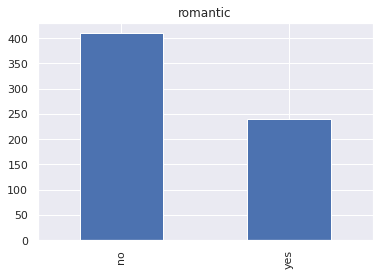

In [6]:
# show the value frequencies for each categorical variable 
df_str = df.select_dtypes(include=['object'])

for col in df_str.columns:
    print("* " + col)
    print(df[col].describe())
    print(df[col].value_counts())
    sns.set()
    df[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

Now that you have seen and grasped the "objects" above, I am going to replicate the process with another data type: "number." However, I will use a histogram rather than a bar plot. Bins will be formed automatically into histograms.

* age
count    649.00
mean      16.74
std        1.22
min       15.00
25%       16.00
50%       17.00
75%       18.00
max       22.00
Name: age, dtype: float64
* Medu
count    649.00
mean       2.51
std        1.13
min        0.00
25%        2.00
50%        2.00
75%        4.00
max        4.00
Name: Medu, dtype: float64
* Fedu
count    649.00
mean       2.31
std        1.10
min        0.00
25%        1.00
50%        2.00
75%        3.00
max        4.00
Name: Fedu, dtype: float64
* traveltime
count    649.00
mean       1.57
std        0.75
min        1.00
25%        1.00
50%        1.00
75%        2.00
max        4.00
Name: traveltime, dtype: float64
* studytime
count    649.00
mean       1.93
std        0.83
min        1.00
25%        1.00
50%        2.00
75%        2.00
max        4.00
Name: studytime, dtype: float64
* failures
count    649.00
mean       0.22
std        0.59
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        3.00
Name: failures, dtype: float64


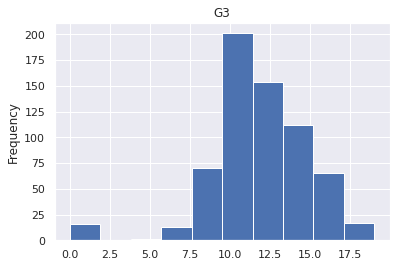

In [7]:
# show the distributions for each numeric variable 
df_num = df.select_dtypes(include=['number'])

for col in df_num.columns:
    print("* " + col)
    print(df[col].describe().round(2)) 
    sns.set()
    df[col].plot.hist()
    plt.title(col)
    plt.show() 

# Selecting columns  

I am going to use the following columns: "sex" "age" "higher" "Walc" "health" and "absences." To be clear, I am not always looking for correlations between two variables while doing predictive analytics. I am attempting to identify patterns in a variety of predictor data fields in order to provide row-level predictions regarding an outcome variable (i.e., "higher"). 

I will need to concentrate on one outcome variable, which means I should choose either Dalc or Walc, but not both. It is prudent to delete any alcohol column that is not selected from the dataset rather than maintain it as a predictor variable. They are almost certainly strongly connected and may be seen as providing the model with the solution. This is referred to as "data leaking." As a result, I am going with Walc over Dalc. It is considered common for young people in Portugal to use alcohol as part of their social activities. As a result, it is probable that Portuguese students use alcohol on weekends.

In [8]:
cols = ['sex', 'age', 'higher', 'Walc', 'health', 'absences']
df = df[cols]
df.head()

,sex,age,higher,Walc,health,absences
0,F,18,yes,1,3,4
1,F,17,yes,1,3,2
2,F,15,yes,3,3,6
3,F,15,yes,1,5,0
4,F,16,yes,2,5,0


Now that I have selected the columns and converted them to a new data frame, I am going to do the same thing with it that I did before.

* sex
count     649
unique      2
top         F
freq      383
Name: sex, dtype: object
F    383
M    266
Name: sex, dtype: int64
* higher
count     649
unique      2
top       yes
freq      580
Name: higher, dtype: object
yes    580
no      69
Name: higher, dtype: int64


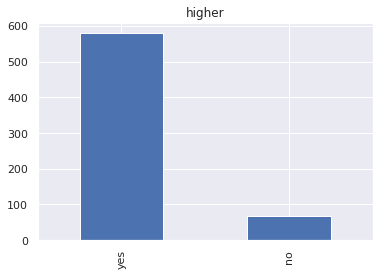

In [9]:
# show the value frequencies for each categorical variable 
df_str = df.select_dtypes(include=['object'])

for col in df_str.columns:
    print("* " + col)
    print(df[col].describe())
    print(df[col].value_counts())
    sns.set()
    df[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

* age
count    649.00
mean      16.74
std        1.22
min       15.00
25%       16.00
50%       17.00
75%       18.00
max       22.00
Name: age, dtype: float64
* Walc
count    649.00
mean       2.28
std        1.28
min        1.00
25%        1.00
50%        2.00
75%        3.00
max        5.00
Name: Walc, dtype: float64
* health
count    649.00
mean       3.54
std        1.45
min        1.00
25%        2.00
50%        4.00
75%        5.00
max        5.00
Name: health, dtype: float64
* absences
count    649.00
mean       3.66
std        4.64
min        0.00
25%        0.00
50%        2.00
75%        6.00
max       32.00
Name: absences, dtype: float64


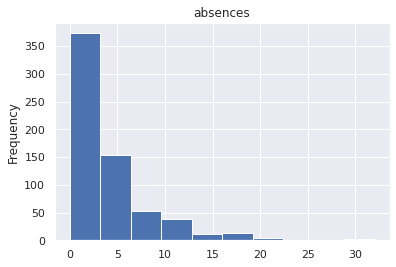

In [10]:
# show the distributions for each numeric variable 
df_num = df.select_dtypes(include=['number'])

for col in df_num.columns:
    print("* " + col)
    print(df[col].describe().round(2)) 
    sns.set()
    df[col].plot.hist()
    plt.title(col)
    plt.show() 

# Handle missing values

I am now going to determine whether or not the dataset has any missing values. It is prudent to do so and eliminate nulls prior to doing machine learning.

In [11]:
# Check if any variable has missing data 

np.sum(df.isnull(), axis=0)

# Encoding categorical variables before using algorithms 

The dataset seems to be complete, with no missing values. Then it is a good thing that I am able to continue. However, before I can proceed with machine learning, I need to do hot encoding on categorical data parameters. A one-hot encoding is a method for encoding category information into binary vectors. To begin with, categorical values must be converted to numerical values. For instance, using this strategy will create distinct columns for the male and female labels in each of the category parameters.

In [12]:
# Check columnbs to make sure we have features and a target variable 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sex       649 non-null    object
 1   age       649 non-null    int64 
 2   higher    649 non-null    object
 3   Walc      649 non-null    int64 
 4   health    649 non-null    int64 
 5   absences  649 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 30.5+ KB


To obtain a brief summary of the dataframe, I used the Pandas dataframe.info () method. Scikit-learn is the tool I am going to utilize currently. It is a Python-based machine learning package that is free and open source. You may choose from a wide range of machine learning techniques to perform classification, regression, and clustering tasks. In order to train a computer, I may use Scikit-learn to encode two categorical columns ("sex" and "higher"). 

In [13]:
# Create a copy of the original DataFrame
df_encoded = df.copy()

# Specify the columns we wish to one-hot encode
label_column1 = "sex" 
label_column2 = "higher"

# Initialize the LabelEncoder
le = LabelEncoder()

# Create two new columns using the fit_transform method of the LabelEncoder
df_encoded[label_column1 + "_enc"] = le.fit_transform(df_encoded[label_column1])
df_encoded[label_column2 + "_enc"] = le.fit_transform(df_encoded[label_column2])

# Preview the original and encoded column
df_encoded[[label_column1, label_column1 + "_enc", label_column2, label_column2 + "_enc"]]

,sex,sex_enc,higher,higher_enc
0,F,0,yes,1
1,F,0,yes,1
2,F,0,yes,1
3,F,0,yes,1
4,F,0,yes,1
...,...,...,...,...
644,F,0,yes,1
645,F,0,yes,1
646,F,0,yes,1
647,M,1,yes,1


The category columns were successfully encoded and contained no mistakes. However, each of you may have difficulty comprehending binary values. Before I go on to machine learning, allow me to clarify. Zero indicates female, while one indicates male in the "sex" column. Zero indicates no, whereas one indicates yes in the "higher" column.

# Select columns prior to partitioning the dataset

Following the encoding of the dataframe, I am going to use "sex_enc", "age", "Walc", "health", and "absences" as X features and "higher" as a y target for data training. 

In [14]:
features = ['sex_enc', 'age', 'Walc', 'health', 'absences']

X = df_encoded[features]
y = df_encoded['higher_enc']

display(X)
y

# Deal with imbalanced class in machine learning 

There is a concern that I want to communicate: my models may simply have learnt that my data has a class imbalance and that they should always pick "positive." The complicated models are then simplified to a ZeroR baseline that always selects the most frequent class. That is what I observe occurring in my logistic model, which I will have shown using a confusion matrix, and it is also plausible that this is the case for my other models. As someone who has had the unpleasant experience of having to inform someone that a fancy model they created did not perform any better than a simple heuristic baseline, I am taking this risk seriously and will be investigating whether my models perform better than a ZeroR baseline prior to submitting the final report.

Therefore, how do I avert this situation? SMOTE is a good place to start. This technique is referred to as "Synthetic Minority Oversampling." This approach produces data for the minority class from scratch. SMOTE operates by selecting a point at random from the minority class and determining its k-nearest neighbors. Between the selected point and its neighbors, synthetic points are added.

The metric trap occurs when one of the most significant issues I encounter when dealing with unbalanced datasets is with the metrics used to evaluate my model. Utilizing simpler measurements such as the accuracy score might be deceptive. In a dataset with extremely imbalanced classes, the classifier will always predict the most frequent class without analyzing the characteristics and will have a high accuracy rate, which is plainly incorrect. 

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


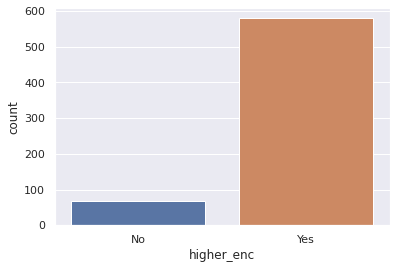

In [15]:
# visualize the target variable
g = sns.countplot(y)
g.set_xticklabels(['No','Yes'])
plt.show()

In [16]:
# import library
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({1: 580, 0: 69})
Resample dataset shape Counter({1: 580, 0: 580})


/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


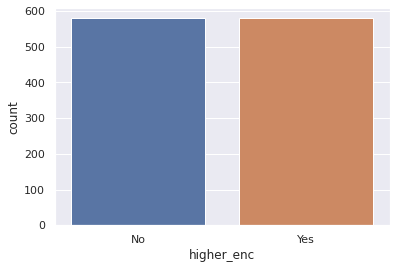

In [17]:
# visualize the target variable
g = sns.countplot(y_smote)
g.set_xticklabels(['No','Yes'])
plt.show()

# Split data into train, test, and holdout sets for models 

Given that the two variables "X" and "y" seem to have been created successfully, it is prudent to begin segmenting data into train and test sets for machine learning models such as decision trees, confusion matrices, logistic regression, and finally random forest regression. These are critical steps in gaining a better understanding of the data on students' alcohol consumption. I am quite fascinated by the passion for higher education in predictive analytics.

I am now using train test split() to create a holdout or validation set. Although there is no built-in procedure for extracting a validation set from a training set, because this only requires dividing it as before, why not use the train test split() method?
Assume I am aiming for a split of 80%/10%/10%. Let us create these ratios and use the train test split() method to divide the dataset into training, testing, and validation subsets:

In [18]:
train_ratio = 0.80
test_ratio = 0.10
validation_ratio = 0.10

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=test_ratio)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio))

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(927, 5)
(116, 5)
(117, 5)


The function "shape" returns the shape of an array, which may be used to see the number of rows in the four variables that were just created during data splitting. 

It seems to be prudent to proceed. My dataset has been successfully partitioned into three sets, which I can now input into a model and use to tweak the hyperparameters during training.

# Baseline models using DummyClassifier and Gaussian Naives Bayes 

DummyClassifier generates predictions that do not take into account the supplied characteristics. This classifier serves as a basic baseline against which more complicated classifiers may be compared. The strategy parameter specifies the precise behavior of the baseline. All techniques create predictions without regard to the feature values supplied as the X parameter when fitting and predicting. 

Predictions, on the other hand, are often dependent on the values seen in the y parameter provided to fit.
Notably, the "stratified" and "uniform" techniques provide non-deterministic predictions that may be made deterministic by adjusting the random state parameter. The remaining techniques are intrinsically deterministic and, once fitted, always provide the same constant forecast for whatever value of X is.

It is comparable to the ZeroR method used in Weka, except that there is no equivalent technique in Python. I discovered a ZeroR-like method online, but the DummyClassifier from the sklearn package seemed to be more beneficial. 

Indeed, DummyClassifier is an excellent baseline classification model. 

In [19]:
from sklearn.dummy import DummyClassifier
# Create dummy classifer to predict the value of target 
dummy = DummyClassifier(strategy='most_frequent', random_state=1)

# "Train" model
dummy.fit(X_train, y_train)

DummyClassifier(random_state=1, strategy='most_frequent')

In [20]:
# Predict on the test set

display(dummy.predict(X_test), dummy.predict(y_test))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [21]:
# Evaluate Performance Metric 

# Get accuracy score
dummy.score(X_test, y_test)  

0.4224137931034483

Let's re-evaluate this dummy classifier on the holdout set 

In [22]:
# Predict on the holdout set

display(dummy.predict(X_valid), dummy.predict(y_valid))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [23]:
# Evaluate Performance Metric 

# Get accuracy score
dummy.score(X_valid, y_valid)  

0.5299145299145299

Now that I have created baseline DummyClassifier models for the train and holdout sets, it seems as if machine learning will predict that students are likely to decline further education after graduating from high school. However, the accuracy ratings are not nearly as high as they might be. It is prudent to use prudence in this regard. 

Let's switch to Naive Bayes on the test set. 

In [24]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Gaussian Naive Bayes model accuracy(in %): 71.55172413793103
Number of mislabeled points out of a total 116 points : 33


In [25]:
# Re-evaluate the Naive Bayes model on the holdout set 

y_pred = gnb.fit(X_train, y_train).predict(X_valid)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_valid, y_pred)*100)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_valid.shape[0], (y_valid != y_pred).sum()))

Gaussian Naive Bayes model accuracy(in %): 66.66666666666666
Number of mislabeled points out of a total 117 points : 39


It is noteworthy that the test set is more accurate than the holdout set when re-evaluation is performed. Thus, the Gaussian Naive Bayes model has an accuracy of around 50–60%. 42-49 points are mislabeled out of a total of 116-117 points. 

I would choose Gaussian Naive Bayes over Dummy Classifier since the latter is more precise and informative.


Now let us turn our attention to the decision tree. 

# Building the decision tree

I am going to establish characteristics that can be modified to avoid over-or under-fitting. The criterion will be "gini," a function for determining the quality of a split. The tree's maximum depth will be 10. A minimum of two samples will be needed to divide a node. At a leaf node, the minimum number of samples needed is one. Pruning's cost complexity parameter will be 0.005. The random state number will be 123. 

In [26]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "criterion": "gini",  # Function to measure the quality of a split: 'Gini' or 'Entropy'
    "max_depth": 10,  # Max depth of the tree
    "min_samples_split": 2,  # Min number of samples required to split a node
    "min_samples_leaf": 1,  # Min number of samples required at a leaf node
    "ccp_alpha": 0.004,  # Cost complexity parameter for pruning
    "random_state": 123,
}

# Create a DecisionTreeClassifier object with the parameters above
clf = DecisionTreeClassifier(**params)

# Train the decision tree classifer on the train set
clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test) 

In [27]:
# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7586206896551724


The accuracy of the decision tree parameters is around 76 percent. As a result, it is almost the most accurate model. I am not going to employ hyperparameter tweaking in conjunction with random search since if the accuracy score is 100%, it may result in a much smaller number of nodes. As a result, the accuracy score should be somewhat lower to allow for more nodes to be seen in the decision tree plot. 

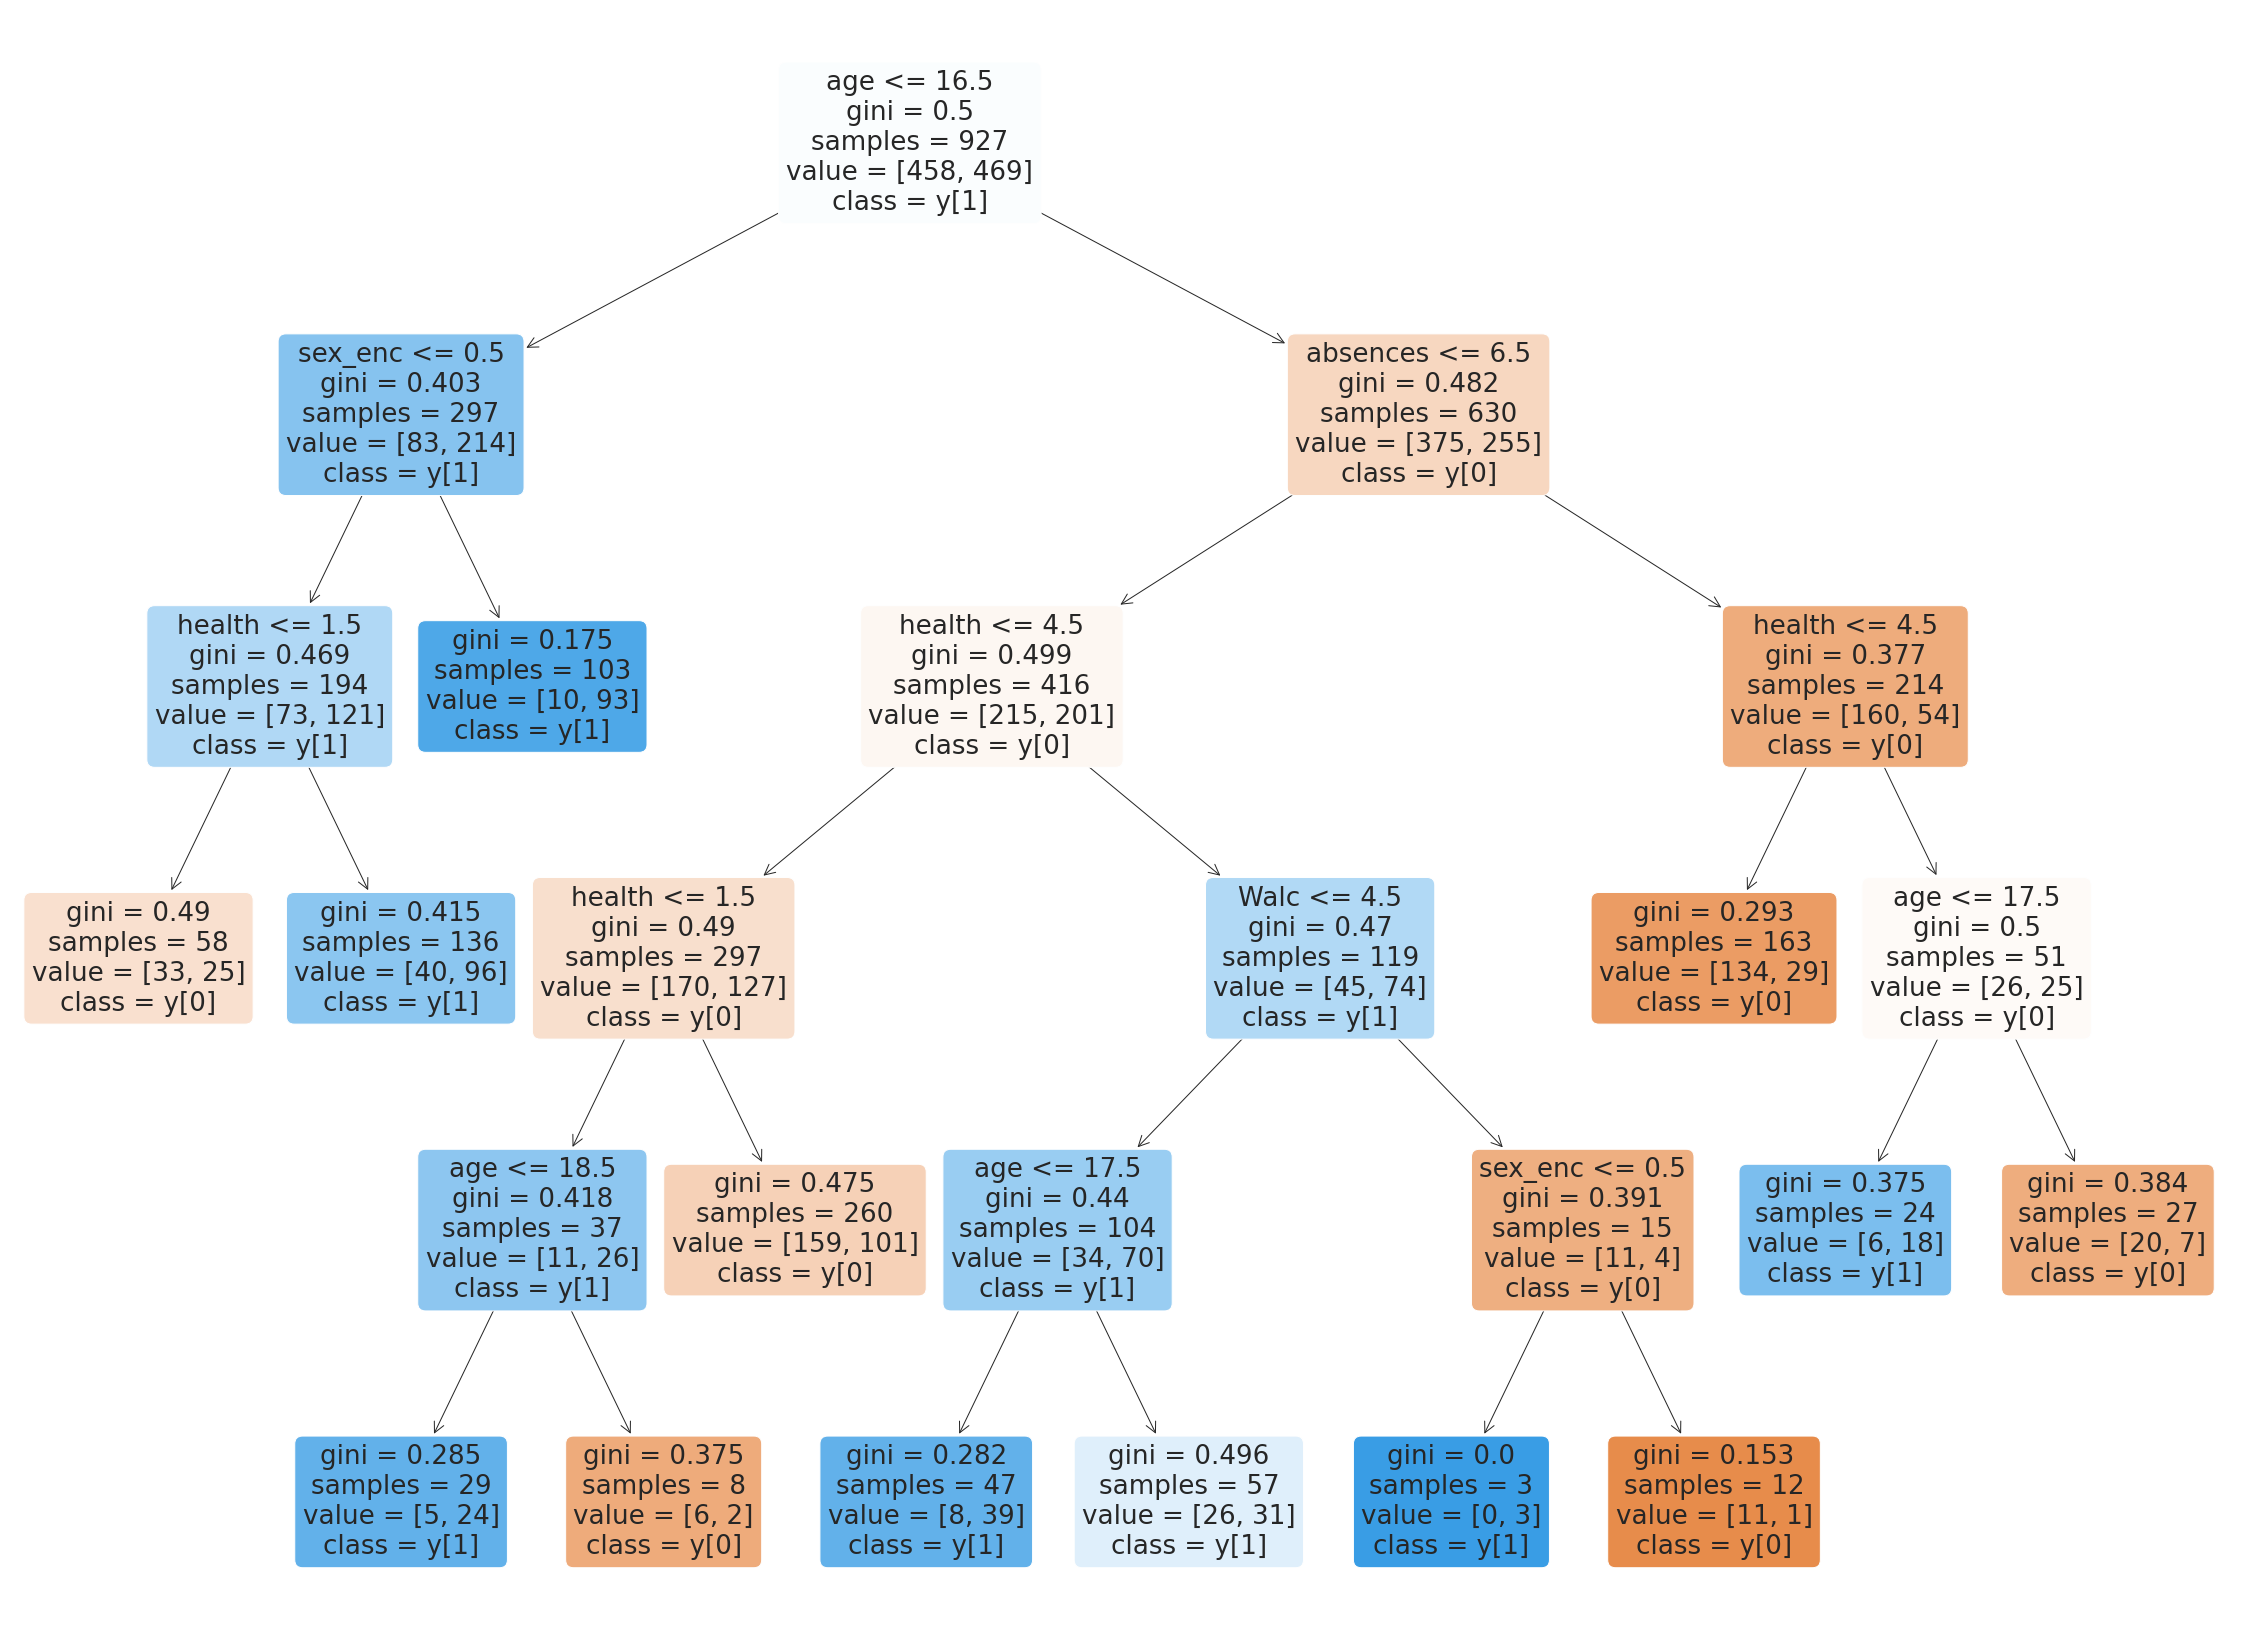

In [28]:
plt.figure(figsize=(40, 30))
tree.plot_tree(clf, feature_names=X.columns, class_names=True, filled=True, rounded=True)

It seems to be a reasonable decision tree plan. It truly helps to have a better understanding of the aspects that contribute to students' enthusiasm for higher education. Before proceeding forward, let us see if re-evaluation with the holdout set produces a different result. 

In [29]:
# Predict the outcomes on the holdout set
y_pred = clf.predict(X_valid) 

In [30]:
# Re-evaluate accuracy
print("Accuracy:", accuracy_score(y_valid, y_pred))

Accuracy: 0.6410256410256411


It illustrates that the accuracy score on the test set is greater than the accuracy score on the holdout set. As a consequence, the decision tree outperforms the holdout on the test set, and no further decision tree plot is required.

Prior to delving into this decision tree architecture, it is vital to grasp basic concepts. If gini is 0, the outcome is the same. If gini = 0.5, the result is an equal number of components. In the example of "sex enc", which is a binary sex category encoded using hot encoding, a value of 0 indicates female and a value of 1 indicates male. A value of 0 implies no and a value of 1 indicates yes for "class."

Slightly more than half of students aged 17 or younger are likely to be interested in pursuing higher education, particularly if they are female and do not have significant health problems. Thus, it seems as if health has a little influence on female students' enthusiasm for higher studies.

If a student is absent for more than six consecutive days, he or she is unlikely to seek further education. It is worthwhile to take it more seriously. Health has a significant impact on students' ability to pursue higher education. There is a tiny danger that certain health concerns may cause a student to lose interest in attending college, but if the student is beyond the age of 18, he or she may still attend.

Despite significant health complications, students who drink alcohol more than four times on weekends are more likely to attend college. This is intriguing and contradicts our first thoughts. While younger pupils are far more likely to attend college, male students have a substantially lower likelihood.

Now that we have shown the extent to which age influences a person's desire for higher education, we must also consider health. Age and health are significant variables in explaining why some students do not attend college. Additionally, we must examine our assumptions about how alcohol may diminish a desire for higher education. Alcoholic beverages may have a distinct effect.

# Logistic Regression Binary Classification 

I am going to predict the target variable using logistic regression binary classification (that is, "higher"). To begin, I need to construct a logistic regression classifier. 

In [31]:
# Standardize X data based on X_train
sc = StandardScaler().fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

# Building a logistic regression classifier 

# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "penalty": "l2",  # Norm of the penalty: 'l1', 'l2', 'elasticnet', 'none'
    "C": 1,  # Inverse of regularization strength, a positive float
    "random_state": 123
}

# Create a logistic regression classifier object with the parameters above
clf = LogisticRegression(**params)

# Train the classifer on the train set
clf = clf.fit(X_train_scaled, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate the accuracy, precision, and recall scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.6724137931034483
Precision: 0.6078431372549019
Recall: 0.6326530612244898


The logistic regression classifier has a classification accuracy of about 67%. It seems to be rather nice. Then I can begin by creating a confusion matrix to compare the real and anticipated labels. 

# Evaluation methods: confusion matrix and ROC curve 

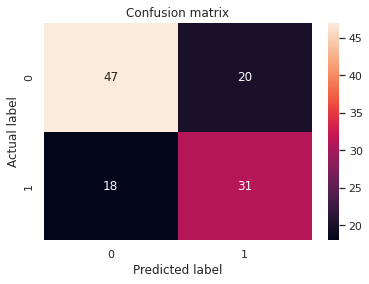

In [32]:
# Calculate confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot a labeled confusion matrix with Seaborn
sns.heatmap(cnf_matrix, annot=True, fmt="g")
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

For people who lack a thirst for higher education, the total number of actual and anticipated labels is 47. For people with a thirst for higher education, the total number of actual and anticipated labels is 31. Thus, it seems as if there are slightly more uninspired students than those motivated to pursue higher education. It is advisable to take it more seriously if you want to encourage pupils who are apathetic about higher education.

Now, let us look at the ROC curve graphic, which illustrates a classification model's performance over all categorization criteria. Two parameters are plotted on this curve: the true positive rate and the false positive rate. 

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


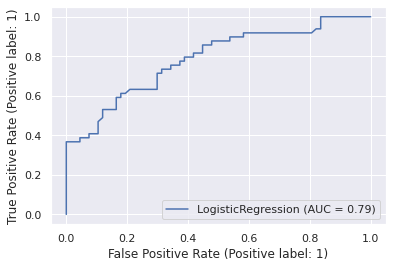

In [33]:
# Plot ROC curve
plot_roc_curve(clf, X_test_scaled, y_test)

Although this ROC curve plot seems to be a decent model, it is not a perfect classifier. I would argue that it is more of a shoddy but somewhat plausible split. 

# Re-evaluate Logistic Regression Binary Classification, Confusion Matrix, and ROC curve on the holdout set 

In [34]:
# Re-evaluate X data based on X_valid 
X_valid_scaled = sc.transform(X_valid)

# Predict the outcomes on the holdout set
y_pred = clf.predict(X_valid_scaled)

# Calculate the accuracy, precision, and recall scores
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("Precision:", precision_score(y_valid, y_pred))
print("Recall:", recall_score(y_valid, y_pred))

Accuracy: 0.6581196581196581
Precision: 0.6666666666666666
Recall: 0.7096774193548387


With the holdout set, it seems to be a little less precise! 

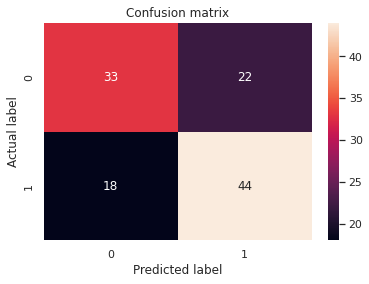

In [35]:
# Calculate confusion matrix on the holdout set 
cnf_matrix = confusion_matrix(y_valid, y_pred)

# Plot a labeled confusion matrix with Seaborn
sns.heatmap(cnf_matrix, annot=True, fmt="g")
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

With the holdout established in place, I can see that there are more students who are interested in pursuing higher education. This results in a slightly lower true negative rate and a slightly higher true positive rate than on the test set. Perhaps this is not a better option since we do not want to exclude people who lack a desire to pursue higher education. We can rekindle their enthusiasm for higher education by providing them with an option to do so. 

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


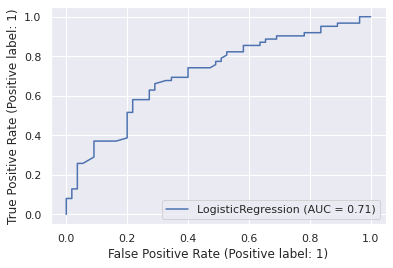

In [36]:
# Plot ROC curve
plot_roc_curve(clf, X_valid_scaled, y_valid)

It seems to be nearly identical to the last one. While this ROC curve plot seems to be a reasonable model, it is far from being a flawless classifier. I would argue that it is a more clumsy but reasonable separation. However, I would argue that it is not necessarily a little better. 

# Random Forest Regression 

Now, I am going to utilize random forest regression to discover which variable in predictive analytics is the most essential. Let us begin by constructing a random forest regressor. 

In [37]:
# Building a random forest regressor 

# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "n_estimators": 97,  # Number of trees in the forest
    "max_depth": 10,  # Max depth of the tree
    "min_samples_split": 3,  # Min number of samples required to split a node
    "min_samples_leaf": 1,  # Min number of samples required at a leaf node
    "ccp_alpha": 0,  # Cost complexity parameter for pruning
    "random_state": 123,
}

# Create a RandomForestRegressor object with the parameters above
rf = RandomForestRegressor(**params)

# Train the random forest on the train set
rf = rf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = rf.predict(X_test)

In [38]:
# Evaluate performance with error metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.23586902407913446
Mean Squared Error: 0.10710948192698695
Root Mean Squared Error: 0.32727584989880776


When performance is evaluated using error measures, the mean absolute error, mean squared error, and root mean squared error are all slightly low. Thus, it is prudent to continue assessing the significance of features. 

# Evaluating feature importance 

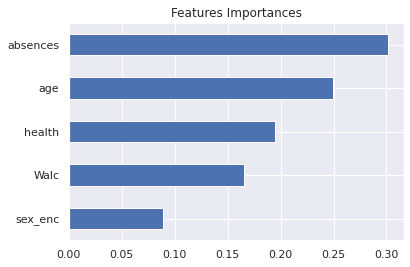

In [39]:
# Create a sorted Series of features importances
importances_sorted = pd.Series(
    data=rf.feature_importances_, index=X_train.columns
).sort_values()

# Plot a horizontal barplot of importances_sorted
importances_sorted.plot(kind="barh")
plt.title("Features Importances")
plt.show()

According to the horizontal bar plot, the most relevant characteristic in predictive analytics is "age," followed by "absences" and "Walc" In predictive analytics, "health" and "sex enc" are the least essential characteristics. As a result, I should have selected "age" as the target variable. It seems as if "age" and "absences" have a greater influence on higher education desire. Due to the important information generated by random forest regression machine learning, I now know that absence has a big impact on students' love for higher education. 

# Hyperparameter tuning with random search

In [40]:
# Define a parameter grid with distributions of possible parameters to use
rs_param_grid = {
    "n_estimators": list((range(20, 200))),
    "max_depth": list((range(3, 12))),
    "min_samples_split": list((range(2, 5))),
    "min_samples_leaf": list((range(1, 5))),
    "ccp_alpha": [0, 0.001, 0.01, 0.1],
}

# Create a RandomForestRegressor
rf = RandomForestRegressor(random_state=123)

# Instantiate RandomizedSearchCV() with rf and the parameter grid
rf_rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rs_param_grid,
    cv=3,  # Number of folds
    n_iter=10,  # Number of parameter candidate settings to sample
    verbose=2,  # The higher this is, the more messages are outputed
    scoring="neg_mean_absolute_error",  # Metric to evaluate performance
    random_state=123
)

# Train the model on the training set
rf_rs.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", rf_rs.best_params_)
print("Best performance: ", rf_rs.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ccp_alpha=0, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=85; total time=   0.2s
[CV] END ccp_alpha=0, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=85; total time=   0.2s
[CV] END ccp_alpha=0, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=85; total time=   0.2s
[CV] END ccp_alpha=0.001, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=150; total time=   0.3s
[CV] END ccp_alpha=0.001, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=150; total time=   0.3s
[CV] END ccp_alpha=0.001, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=150; total time=   0.3s
[CV] END ccp_alpha=0, max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=110; total time=   0.2s
[CV] END ccp_alpha=0, max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=110; total time=   0.2s
[CV] END ccp_alpha=0,

After doing hyperparameter tweaking through random search, the best parameters discovered correspond to my parameters. As a result, random forest regression does not need to be repeated. 

# Re-evaluate Random Forest Regression on the holdout set 

After tweaking the hyperparameters using random search, it is required to replicate the same lines of code used in Random Forest Regression and re-evaluate them on the holdout set. It is not as if I want to create a new model.

In [41]:
# Building a random forest regressor 

# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "n_estimators": 97,  # Number of trees in the forest
    "max_depth": 10,  # Max depth of the tree
    "min_samples_split": 3,  # Min number of samples required to split a node
    "min_samples_leaf": 1,  # Min number of samples required at a leaf node
    "ccp_alpha": 0,  # Cost complexity parameter for pruning
    "random_state": 123,
}

# Create a RandomForestRegressor object with the parameters above
rf = RandomForestRegressor(**params)

# Train the random forest on the train set
rf = rf.fit(X_train, y_train)

# Predict the outcomes on the holdout set
y_pred = rf.predict(X_valid)

In [42]:
# Re-evaluate performance with error metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_valid, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_valid, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

Mean Absolute Error: 0.2832618468751697
Mean Squared Error: 0.14482010945844517
Root Mean Squared Error: 0.3805523741332396


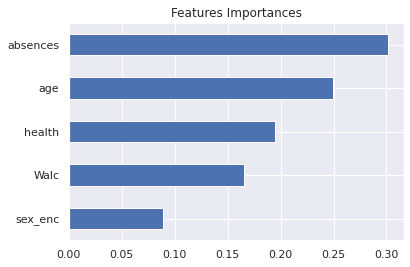

In [43]:
# Create a sorted Series of features importances
importances_sorted = pd.Series(
    data=rf.feature_importances_, index=X_train.columns
).sort_values()

# Plot a horizontal barplot of importances_sorted
importances_sorted.plot(kind="barh")
plt.title("Features Importances")
plt.show()

The graphs of the test and holdout sets do not demonstrate any statistically significant difference. However, when I re-evaluated performance on the holdout set using error metrics, the results looked to be somewhat lower than on the test set. Thus, everything is well with the holdout set. 